In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [13]:
df = pd.read_csv("datasets/ispu_dki_all.csv")

In [14]:
df.head()

,tanggal,stasiun,pm10,pm25,so2,co,o3,no2,max,critical,categori
0,2010-01-01,DKI1 (Bunderan HI),60.0,NaN,4.0,73.0,27.0,14.0,73.0,CO,SEDANG
1,2010-01-02,DKI1 (Bunderan HI),32.0,NaN,2.0,16.0,33.0,9.0,33.0,O3,BAIK
2,2010-01-03,DKI1 (Bunderan HI),27.0,NaN,2.0,19.0,20.0,9.0,27.0,PM10,BAIK
3,2010-01-04,DKI1 (Bunderan HI),22.0,NaN,2.0,16.0,15.0,6.0,22.0,PM10,BAIK
4,2010-01-05,DKI1 (Bunderan HI),25.0,NaN,2.0,17.0,15.0,8.0,25.0,PM10,BAIK


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4626 entries, 0 to 4625
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4626 non-null   object 
 1   stasiun   4626 non-null   object 
 2   pm10      4466 non-null   float64
 3   pm25      723 non-null    float64
 4   so2       4607 non-null   float64
 5   co        4618 non-null   float64
 6   o3        4621 non-null   float64
 7   no2       4618 non-null   float64
 8   max       4626 non-null   float64
 9   critical  4625 non-null   object 
 10  categori  4626 non-null   object 
dtypes: float64(7), object(4)
memory usage: 397.7+ KB


In [16]:
df.describe()

,pm10,pm25,so2,co,o3,no2,max
count,4466.000000,723.000000,4607.000000,4618.000000,4621.000000,4618.000000,4626.000000
mean,65.086879,94.374827,28.183851,30.263534,86.586670,18.120832,99.432123
std,19.243150,27.427553,13.822107,13.640344,50.295879,8.451605,43.284775
min,0.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.000000,76.000000,18.000000,21.000000,51.000000,13.000000,70.000000
50%,64.000000,94.000000,27.000000,29.000000,78.000000,17.000000,91.000000
75%,75.000000,111.000000,34.000000,37.000000,110.000000,21.000000,118.000000
max,179.000000,287.000000,126.000000,134.000000,314.000000,134.000000,314.000000


# EDA

In [17]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

In [18]:
pollutants = ['pm10', 'pm25', 'so2', 'co', 'o3', 'no2']

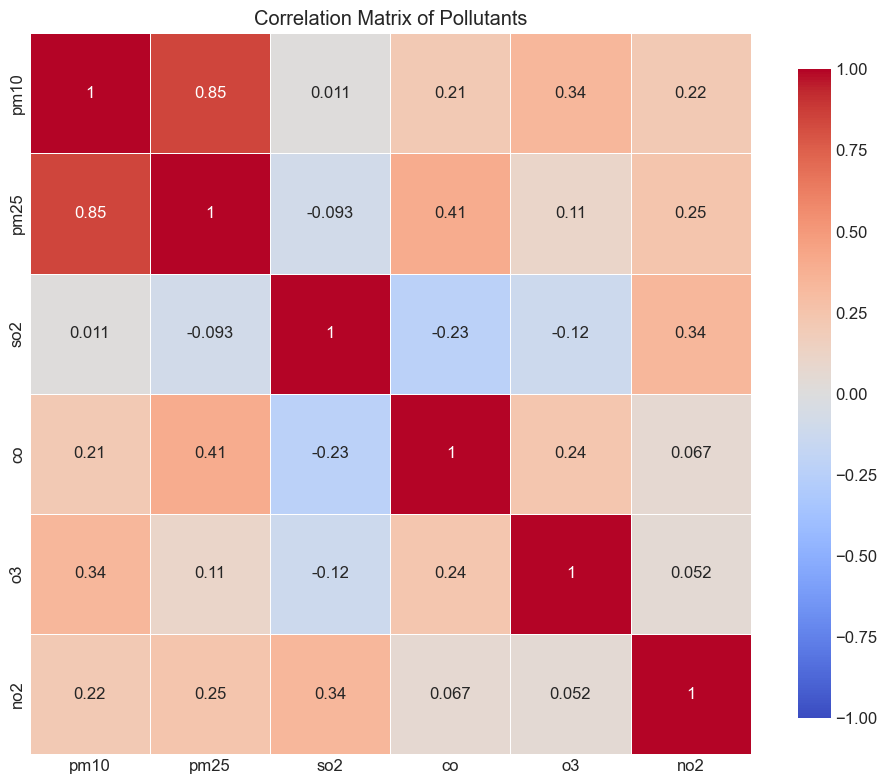

In [19]:
corr_matrix = df[pollutants].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, square=True, linewidths=0.5, cbar_kws={"shrink": .9})
plt.title('Correlation Matrix of Pollutants')
plt.tight_layout()
plt.show()

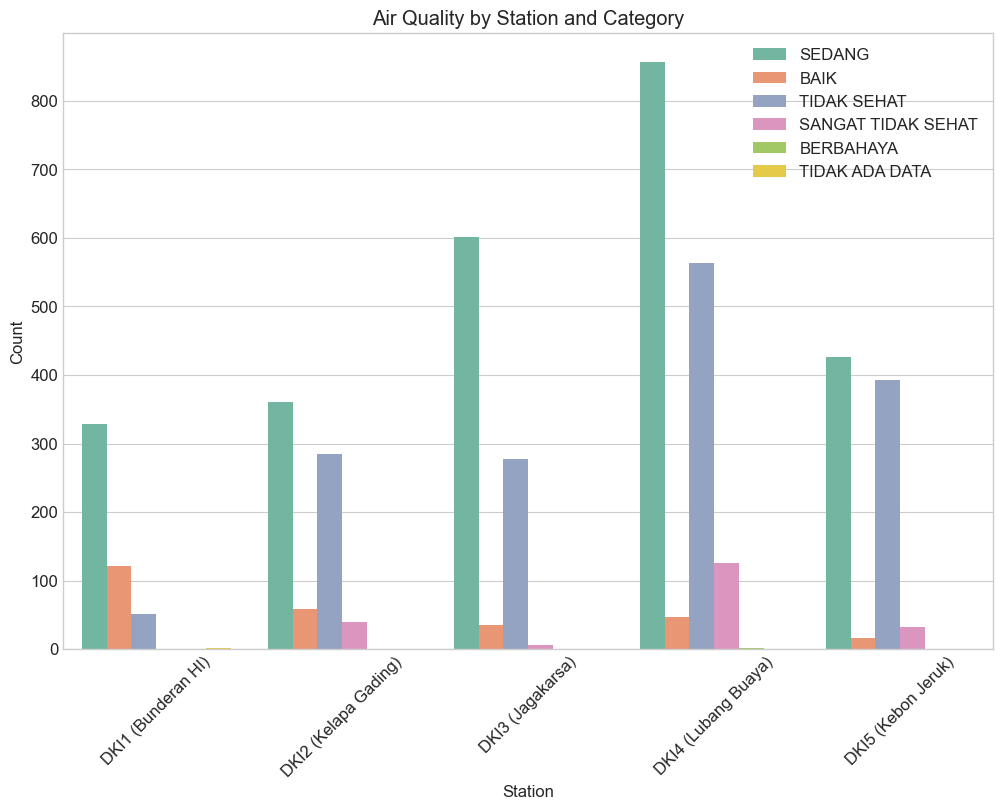

In [20]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='stasiun', hue='categori', palette='Set2')
plt.title("Air Quality by Station and Category")
plt.xlabel("Station")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.show()

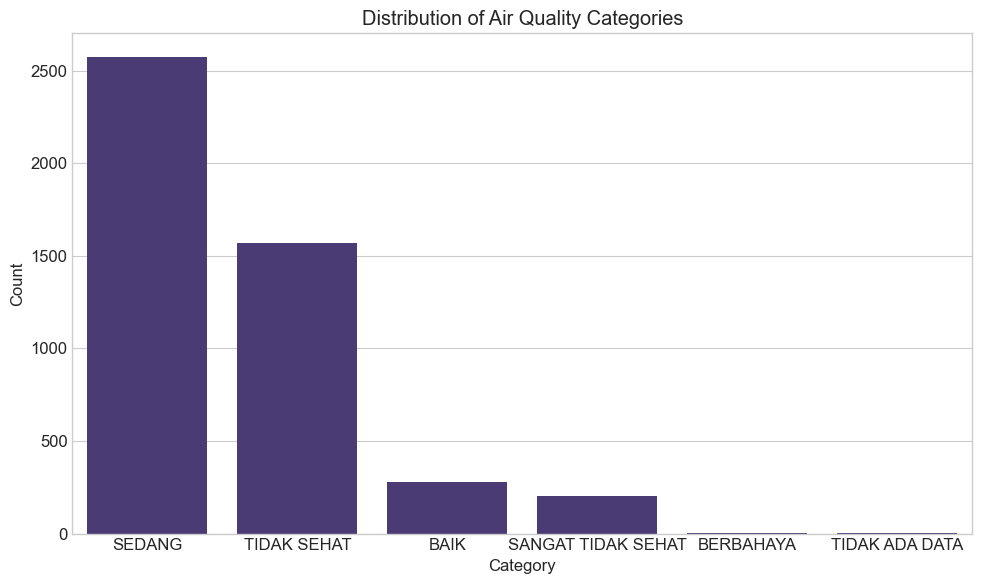

In [21]:
plt.figure(figsize=(10, 6))
category_counts = df['categori'].value_counts()
sns.barplot(x=category_counts.index, y=category_counts.values)
plt.title('Distribution of Air Quality Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_36120\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_36120\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_36120\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_36120\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
C:\Users\Asus TUF\AppData\Local\Temp\ipykernel_36120\1473510002.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].s

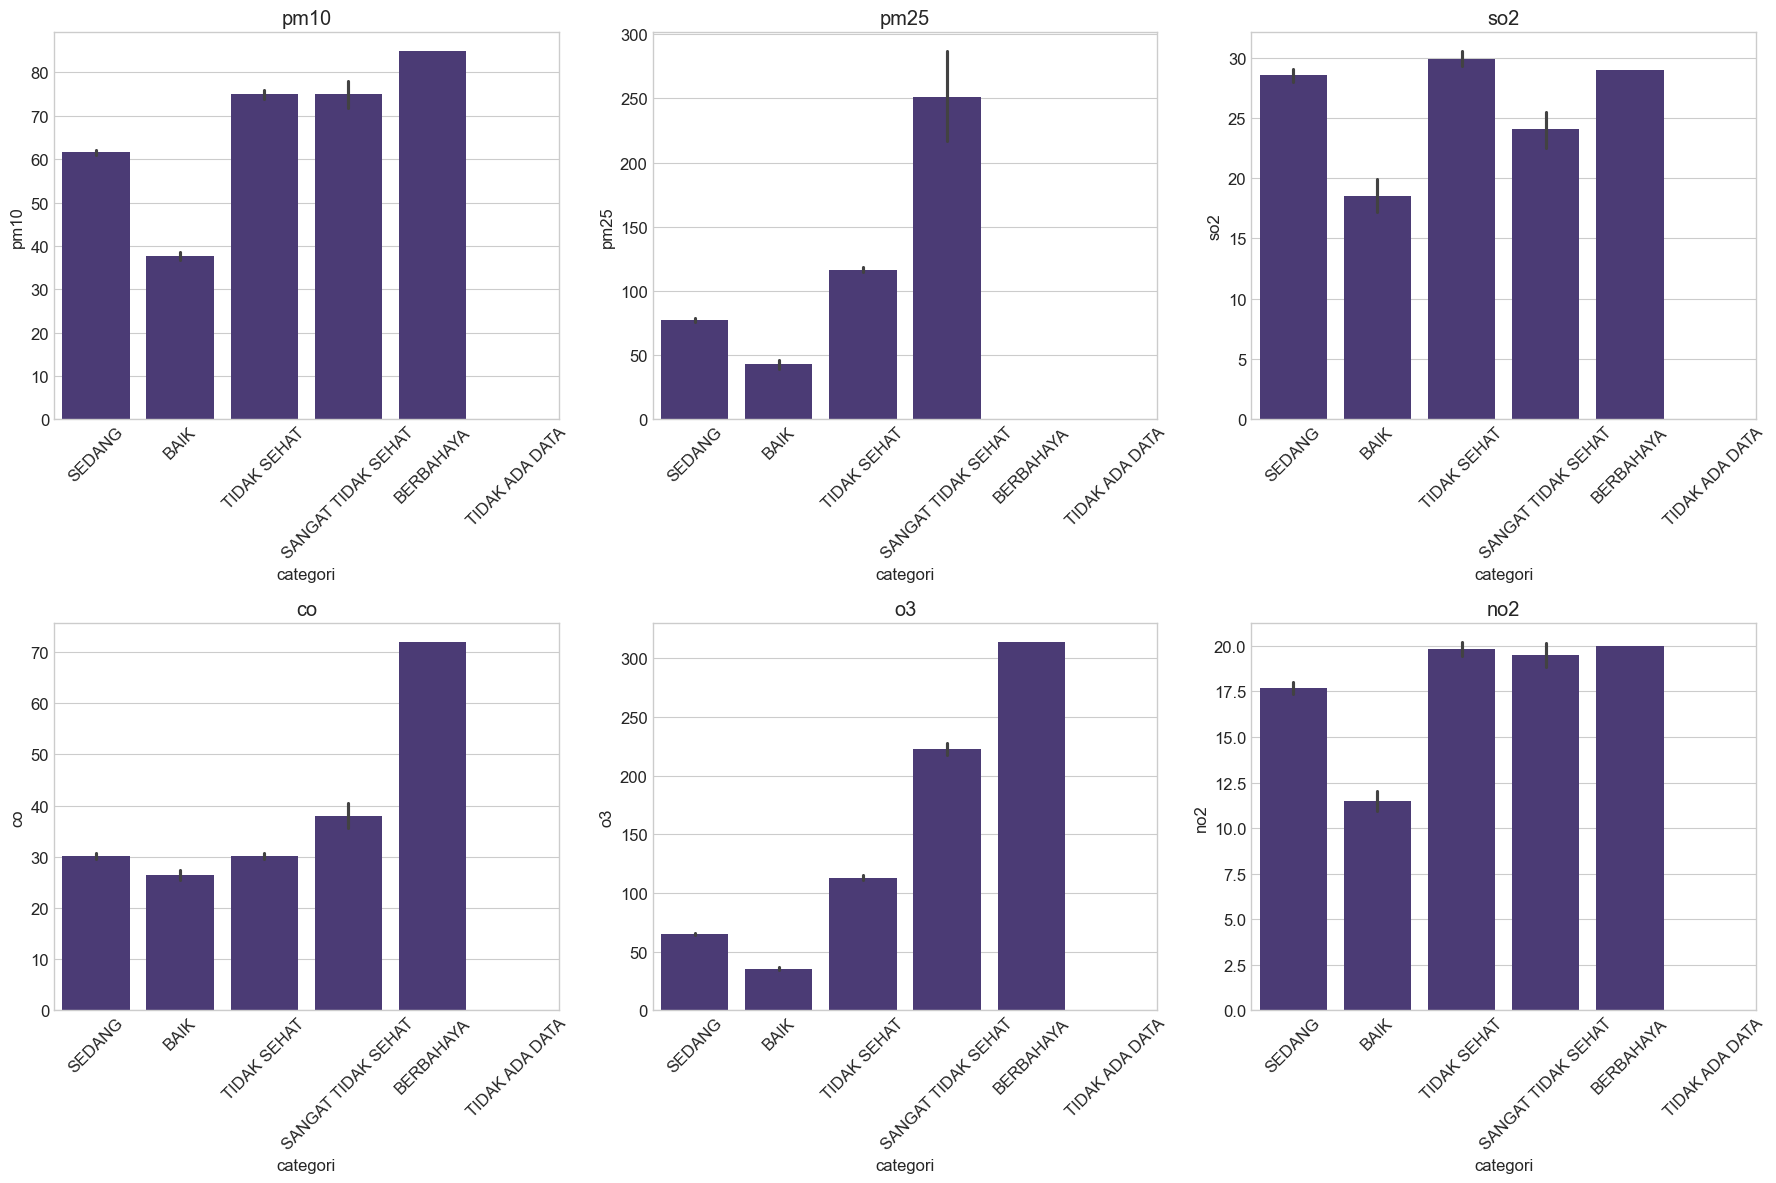

In [22]:
fig, axes = plt.subplots(2,3,figsize=(18,12))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    sns.barplot(x='categori', y=col, data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)
    
plt.tight_layout()
plt.show()

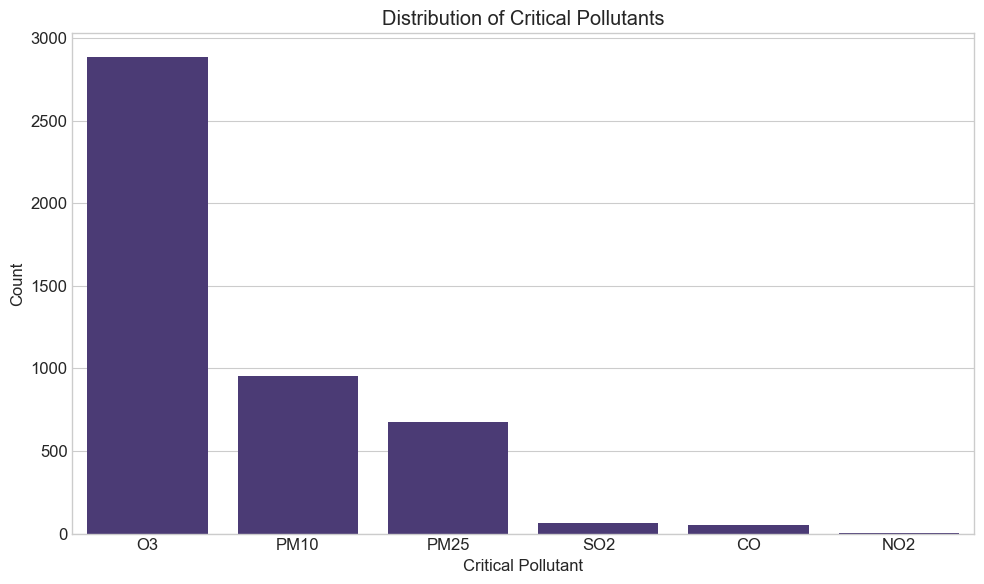

In [23]:
plt.figure(figsize=(10, 6))
critical_counts = df['critical'].value_counts()
sns.barplot(x=critical_counts.index, y=critical_counts.values)
plt.title('Distribution of Critical Pollutants')
plt.xlabel('Critical Pollutant')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

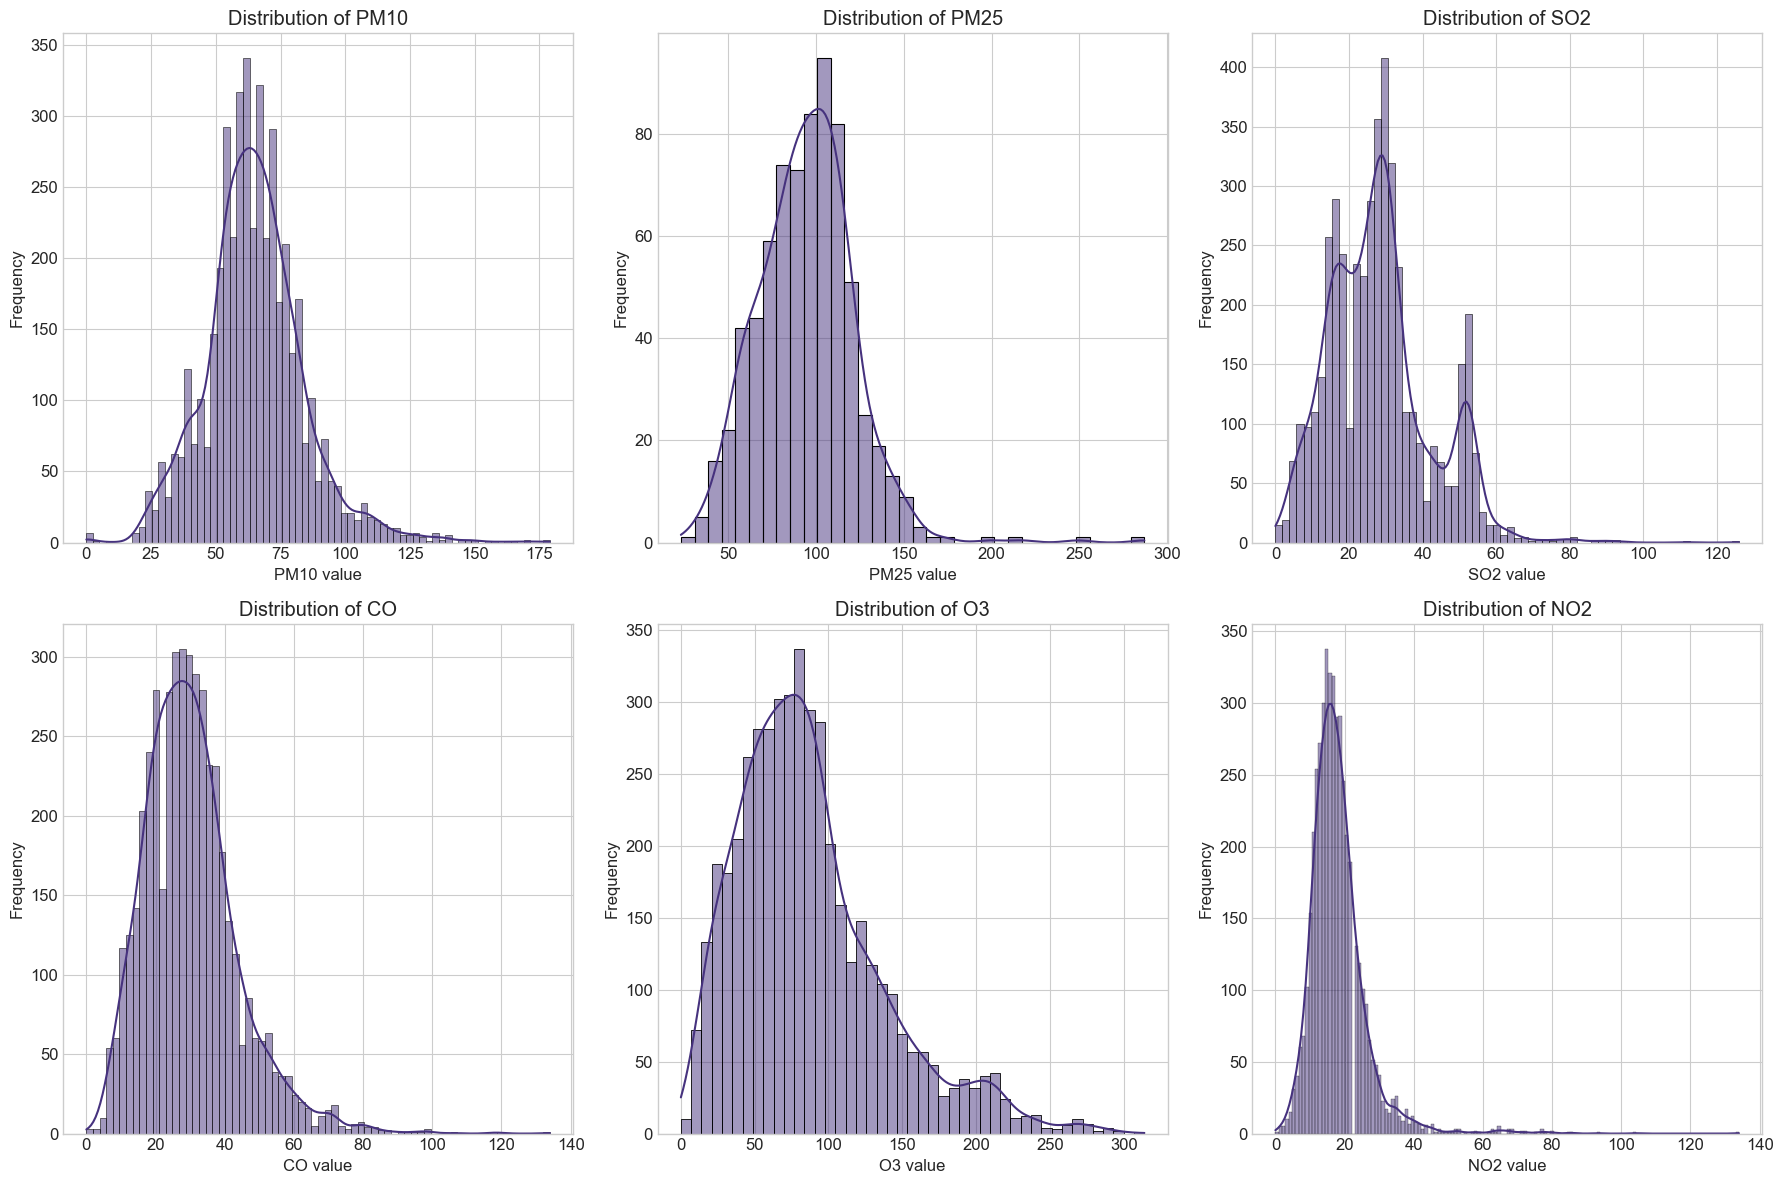

In [24]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, col in enumerate(pollutants):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.upper()}')
    axes[i].set_xlabel(f'{col.upper()} value')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

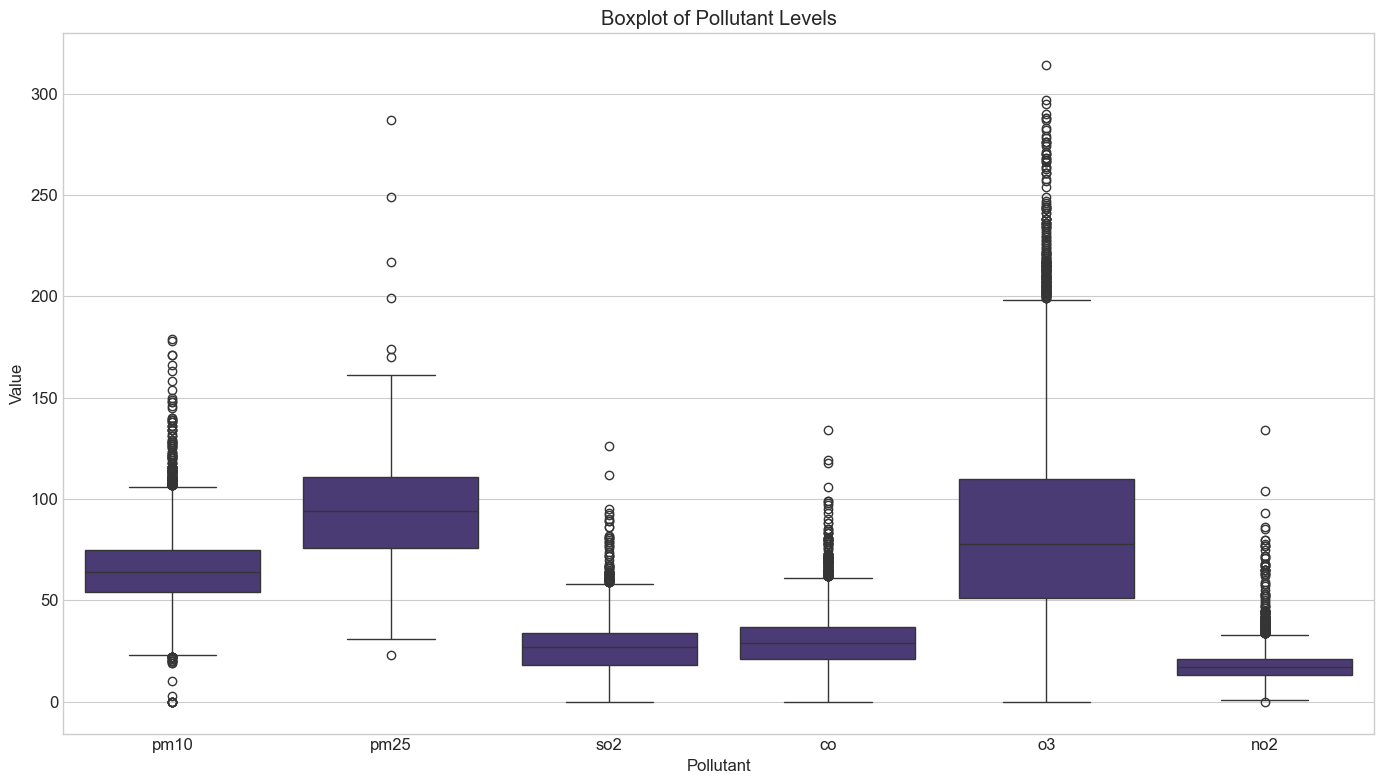

In [25]:
plt.figure(figsize=(14, 8))
melted_df = pd.melt(df[pollutants], var_name='Pollutant', value_name='Value')
sns.boxplot(x='Pollutant', y='Value', data=melted_df)
plt.title('Boxplot of Pollutant Levels')
plt.tight_layout()
plt.show()

In [26]:
for i in pollutants:
    print(i)
    print("Skewness: ", df[i].skew())
    print("Kurtosis: ", df[i].kurtosis())
    print("")

pm10
Skewness:  0.6976283251875913
Kurtosis:  2.543138686566048

pm25
Skewness:  0.8741804093854169
Kurtosis:  4.669665749386857

so2
Skewness:  0.8060767113861756
Kurtosis:  1.3852250609833892

co
Skewness:  1.1495489468612519
Kurtosis:  3.1162217254138214

o3
Skewness:  1.0834534296825264
Kurtosis:  1.3355325598728496

no2
Skewness:  3.09859507356851
Kurtosis:  21.378148794894177



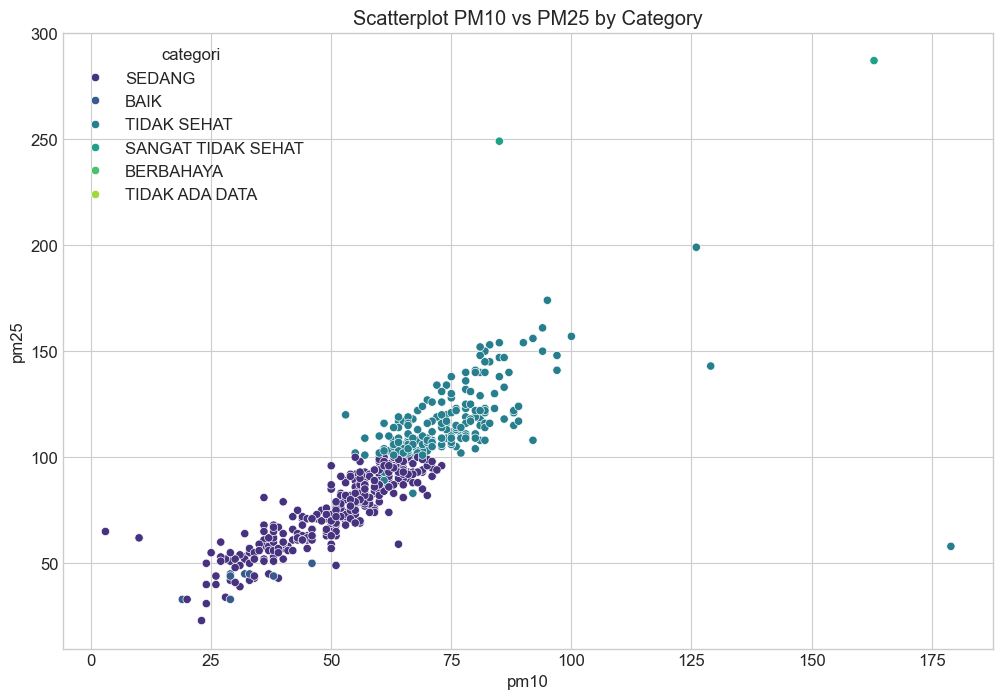

In [27]:
sns.scatterplot(data=df, x='pm10', y='pm25', hue='categori')
plt.title('Scatterplot PM10 vs PM25 by Category')
plt.show()

# Preprocessing Data

In [28]:
df.duplicated().sum()

0

In [29]:
missing_values = df.isnull().sum()
missing_percent = 100 * missing_values / len(df)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                            'Percentage': missing_percent})
missing_df

,Missing Values,Percentage
tanggal,0,0.000000
stasiun,0,0.000000
pm10,160,3.458712
pm25,3903,84.370947
so2,19,0.410722
co,8,0.172936
o3,5,0.108085
no2,8,0.172936
max,0,0.000000
critical,1,0.021617


In [30]:
df = df.fillna(df.median(numeric_only=True))

In [31]:
for column in df.columns:
    mode = df[column].mode()
    if not mode.empty:
        df[column] = df[column].fillna(mode[0])

In [32]:
missing_values = df.isnull().sum()
missing_percent = 100 * missing_values / len(df)
missing_df = pd.DataFrame({'Missing Values': missing_values, 
                            'Percentage': missing_percent})
missing_df

,Missing Values,Percentage
tanggal,0,0.0
stasiun,0,0.0
pm10,0,0.0
pm25,0,0.0
so2,0,0.0
co,0,0.0
o3,0,0.0
no2,0,0.0
max,0,0.0
critical,0,0.0


In [33]:
df = df[df['categori'] != 'BERBAHAYA']
df = df[df['categori'] != 'TIDAK ADA DATA']


In [34]:
df_for_date = df

In [35]:
x, y = [], []

features_name = []

for i in range(7, len(df_for_date)):
    sliding_window_df = df_for_date.iloc[i - 7:i]

    features = []

    for col in ['pm10', 'so2', 'co', 'o3', 'no2']:
        series = sliding_window_df[col]
        stats = {
            f"mean_{col}": series.mean(),
            f'std_{col}': series.std(),
            f'min_{col}': series.min(),
            f'max_{col}': series.max(),
            f'median_{col}': series.median(),
            f'range_{col}': series.max() - series.min(),
            f'last_{col}': series.iloc[-1],
            f'slope_{col}': np.polyfit(range(len(series)), series, 1)[0],
        }

        if i == 7: 
            features_name.extend(stats.keys()) 

        features.extend(stats.values())
    
    label = df_for_date.iloc[i]['categori']
    x.append(features)
    y.append(label)

x = pd.DataFrame(x, columns=features_name)
y = pd.Series(y)


In [36]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 40 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   mean_pm10    4617 non-null   float64
 1   std_pm10     4617 non-null   float64
 2   min_pm10     4617 non-null   float64
 3   max_pm10     4617 non-null   float64
 4   median_pm10  4617 non-null   float64
 5   range_pm10   4617 non-null   float64
 6   last_pm10    4617 non-null   float64
 7   slope_pm10   4617 non-null   float64
 8   mean_so2     4617 non-null   float64
 9   std_so2      4617 non-null   float64
 10  min_so2      4617 non-null   float64
 11  max_so2      4617 non-null   float64
 12  median_so2   4617 non-null   float64
 13  range_so2    4617 non-null   float64
 14  last_so2     4617 non-null   float64
 15  slope_so2    4617 non-null   float64
 16  mean_co      4617 non-null   float64
 17  std_co       4617 non-null   float64
 18  min_co       4617 non-null   float64
 19  max_co

In [37]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4617 entries, 0 to 4616
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
4617 non-null   object
dtypes: object(1)
memory usage: 36.2+ KB


In [38]:
df = pd.get_dummies(df, columns=['critical'])

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['categori'] = label_encoder.fit_transform(df['categori'])
y = label_encoder.fit_transform(y)

In [40]:
print(pd.Series(y).value_counts())

2    2573
3    1568
0     274
1     202
Name: count, dtype: int64


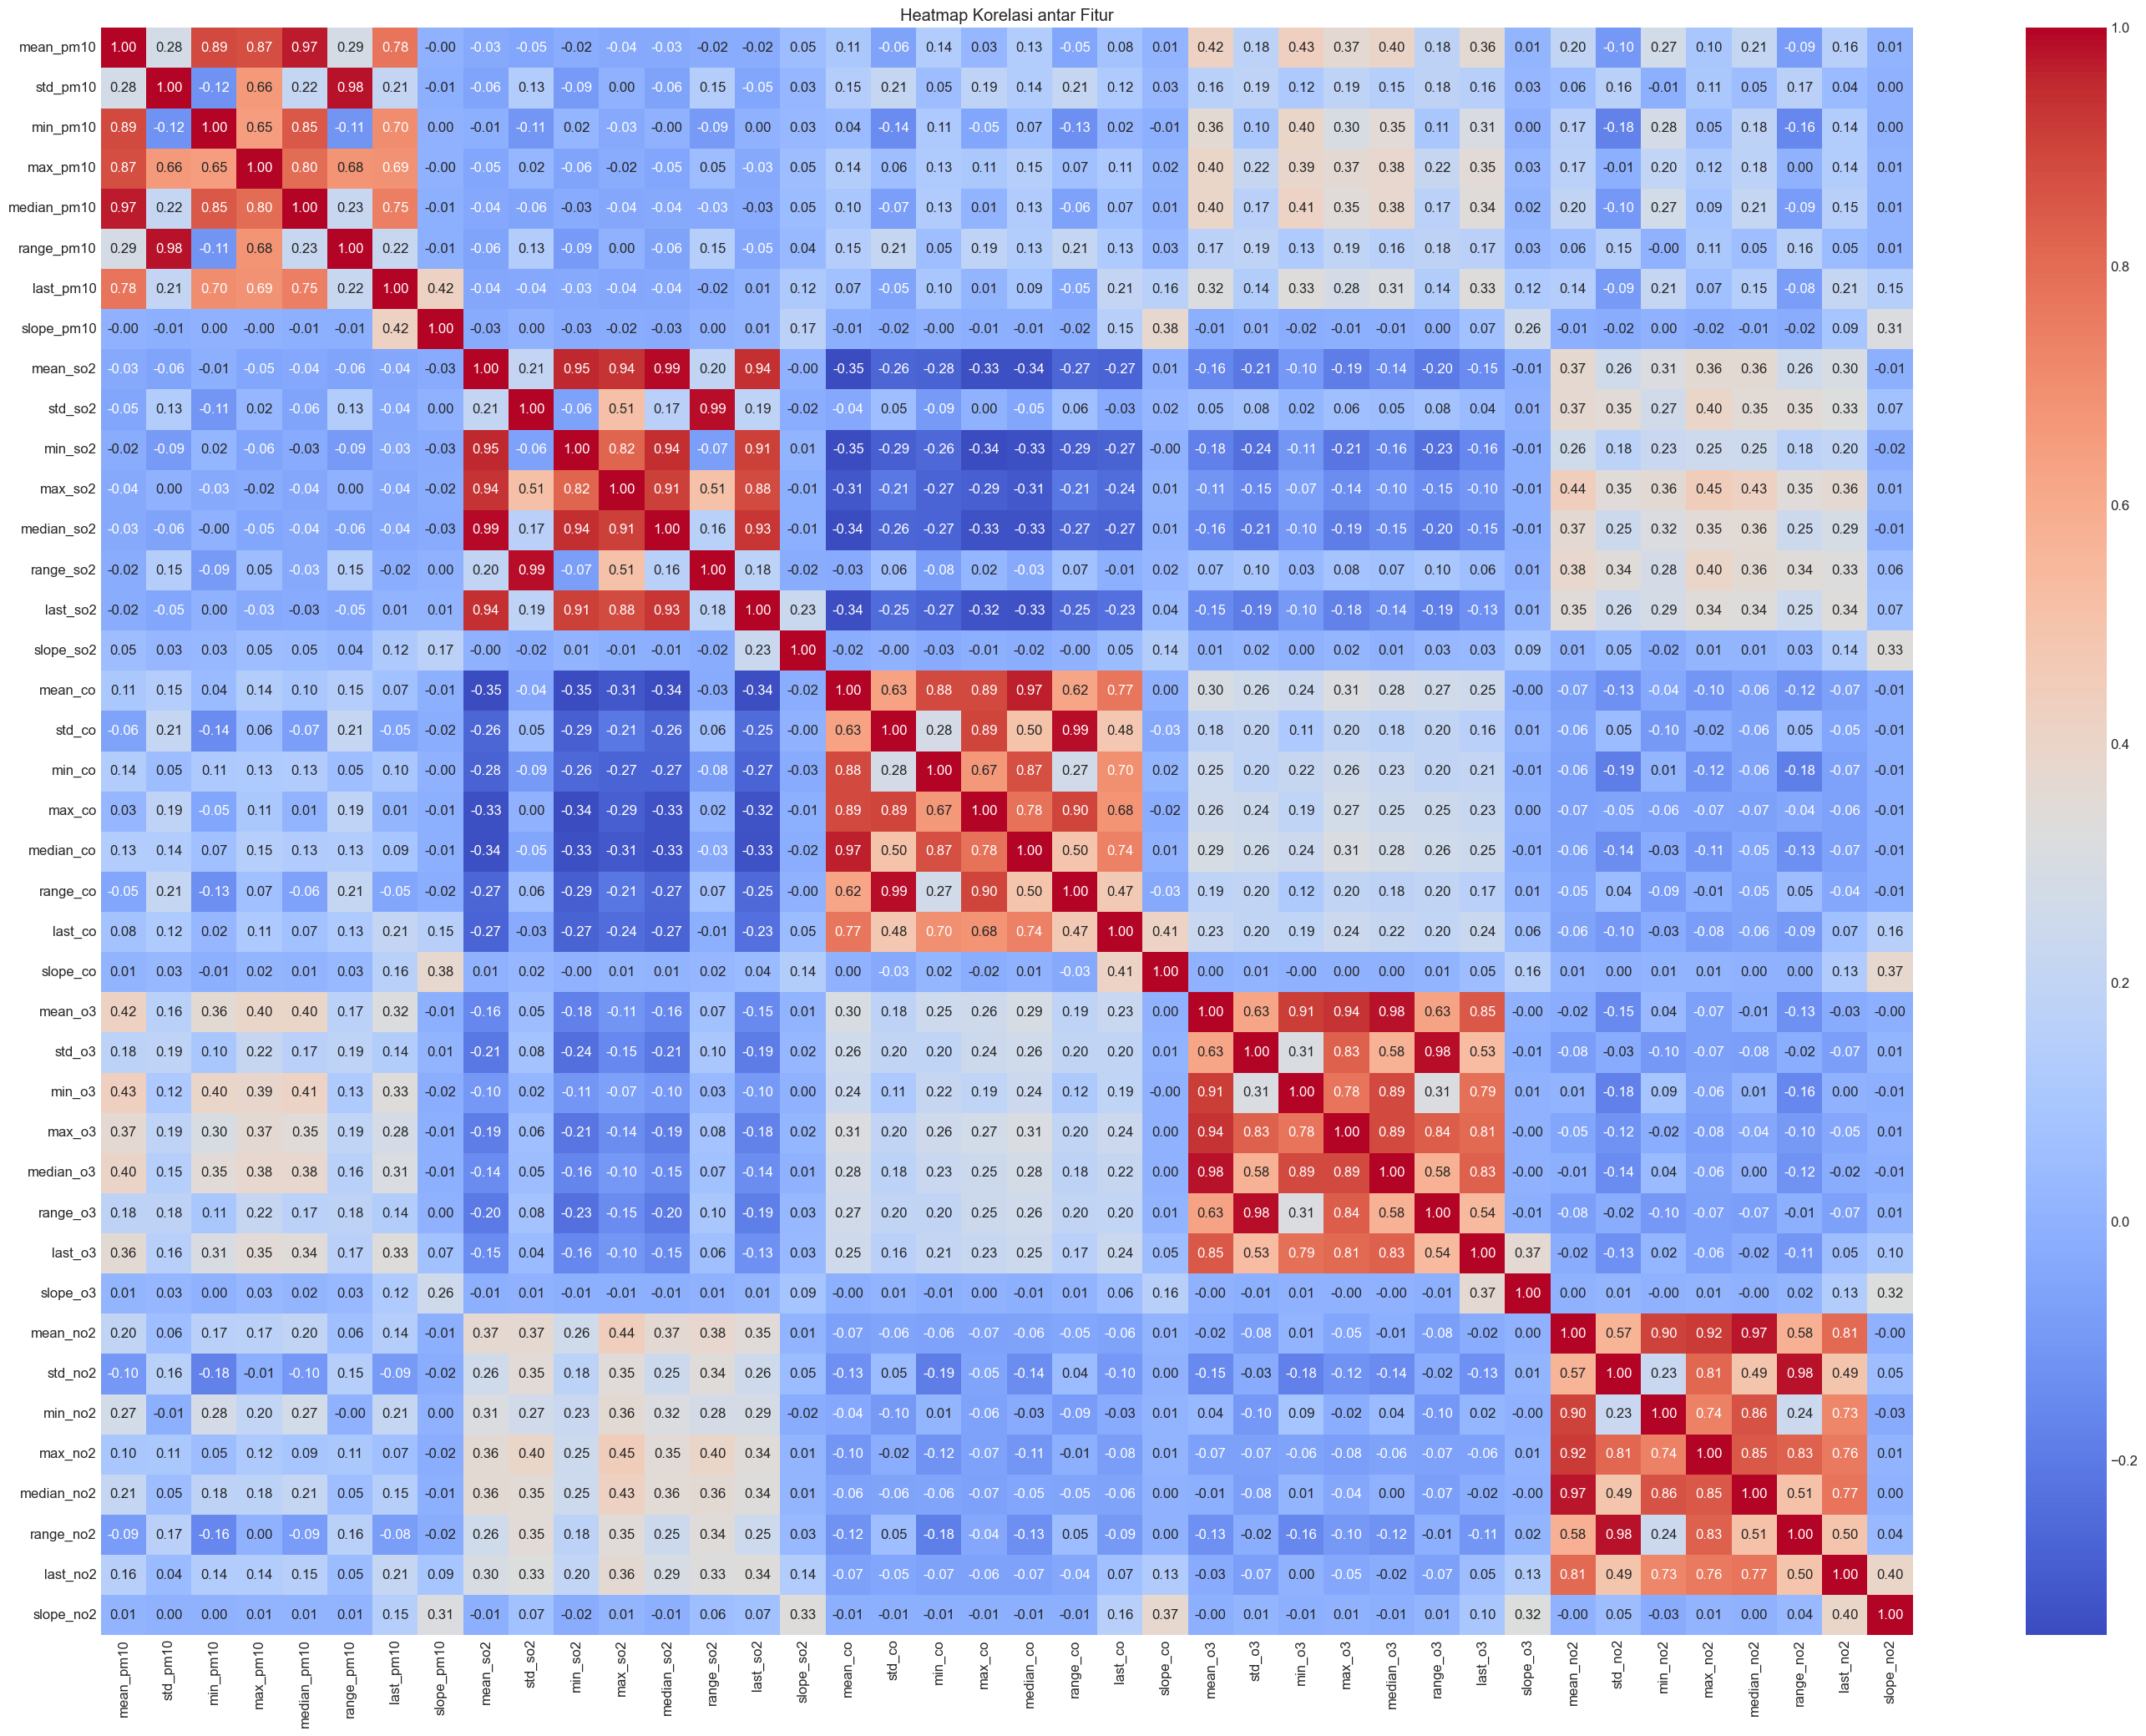

In [41]:
plt.figure(figsize=(35, 25))
sns.heatmap(x.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Heatmap Korelasi antar Fitur")
plt.show()

# MODELLING

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import pickle

C:\Users\Asus TUF\AppData\Roaming\Python\Python312\site-packages\dask\dataframe\__init__.py:49: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [43]:
def split_data(X, y, train_size=0.8, val_size=0.1, test_size=0.1, random_state=42):
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=train_size, random_state=random_state, stratify=y)
    relative_val_size = val_size / (val_size + test_size)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, train_size=relative_val_size, random_state=random_state, stratify=y_temp)
    return X_train, X_val, X_test, y_train, y_val, y_test

def perform_cross_validation(model, X, y, cv=5, scoring='f1_weighted'):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring=scoring, n_jobs=-1)
    print(f"Cross-validation scores ({cv}-fold): {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean():.4f}, Std: {cv_scores.std():.4f}")

# Modelling Date

In [44]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(x, y)

In [45]:
X_train_df = pd.DataFrame(X_train, columns=x.columns)
print(X_train_df.columns)


Index(['mean_pm10', 'std_pm10', 'min_pm10', 'max_pm10', 'median_pm10',
       'range_pm10', 'last_pm10', 'slope_pm10', 'mean_so2', 'std_so2',
       'min_so2', 'max_so2', 'median_so2', 'range_so2', 'last_so2',
       'slope_so2', 'mean_co', 'std_co', 'min_co', 'max_co', 'median_co',
       'range_co', 'last_co', 'slope_co', 'mean_o3', 'std_o3', 'min_o3',
       'max_o3', 'median_o3', 'range_o3', 'last_o3', 'slope_o3', 'mean_no2',
       'std_no2', 'min_no2', 'max_no2', 'median_no2', 'range_no2', 'last_no2',
       'slope_no2'],
      dtype='object')


In [46]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

with open("models/weather_date_scaler.pkl", 'wb') as file:
    pickle.dump(scaler, file)


In [47]:
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(objective='multi:softmax', num_class=4, random_state=42),
    "LightBGM": LGBMClassifier(objective='multiclass',num_class=4,random_state=42),
}

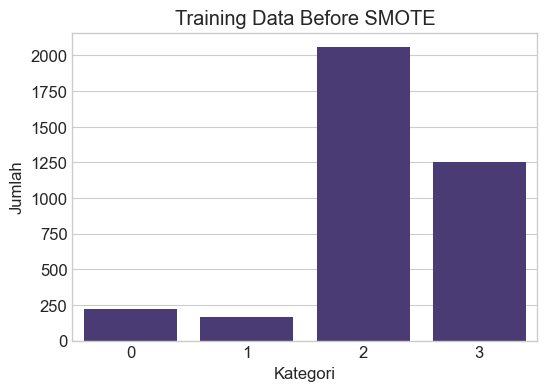

In [48]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [49]:
from imblearn.over_sampling import SMOTE

In [50]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

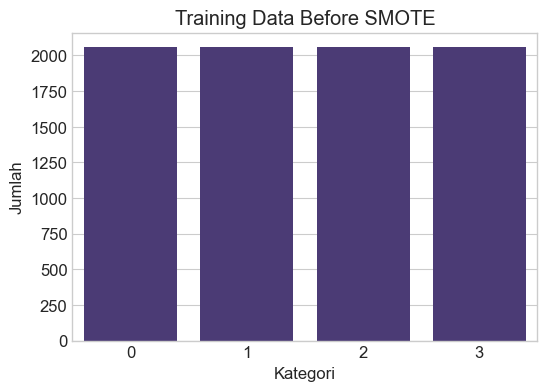

In [51]:
plt.figure(figsize=(6,4))
sns.countplot(x=y_train)
plt.title('Training Data Before SMOTE')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')
plt.show()

In [52]:
for name, model in models.items():
    print(name)
    perform_cross_validation(model,X_train,y_train)
    print("==================================")

Random Forest
Cross-validation scores (5-fold): [0.85229009 0.84262686 0.85558537 0.88548745 0.88390814]
Mean CV score: 0.8640, Std: 0.0175
XGBoost
Cross-validation scores (5-fold): [0.82928165 0.83360736 0.84480492 0.88958087 0.88315007]
Mean CV score: 0.8561, Std: 0.0253
LightBGM
Cross-validation scores (5-fold): [0.81951301 0.83507048 0.85299284 0.90315234 0.88239764]
Mean CV score: 0.8586, Std: 0.0305


In [53]:


val_scores = {}

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train, y_train)
    
    y_val_pred = model.predict(X_val)
    y_val_proba = model.predict_proba(X_val)[:, 1]
    acc = accuracy_score(y_val, y_val_pred)
    rec = recall_score(y_val, y_val_pred, average='weighted')
    f1 = f1_score(y_val, y_val_pred, average='weighted')
    prec = precision_score(y_val, y_val_pred, average='weighted')

    val_scores[name] = [acc, rec, f1, prec]
    
    print(f"Validation Accuracy ({name}): {acc:.4f}")
    print(f"Validation Recall ({name}): {rec:.4f}")
    print(f"Validation F1 ({name}): {f1:.4f}")
    print(f"Validation Precision ({name}): {prec:.4f}")
    print(classification_report(y_val, y_val_pred))

    
    # Only 1 model
    with open("models/predict_date4.pkl", "wb") as file:
        pickle.dump(model, file)


Training Random Forest...
Validation Accuracy (Random Forest): 0.6667
Validation Recall (Random Forest): 0.6667
Validation F1 (Random Forest): 0.6669
Validation Precision (Random Forest): 0.6689
              precision    recall  f1-score   support

           0       0.47      0.59      0.52        27
           1       0.52      0.60      0.56        20
           2       0.73      0.74      0.74       258
           3       0.61      0.57      0.59       157

    accuracy                           0.67       462
   macro avg       0.59      0.62      0.60       462
weighted avg       0.67      0.67      0.67       462


Training XGBoost...
Validation Accuracy (XGBoost): 0.6818
Validation Recall (XGBoost): 0.6818
Validation F1 (XGBoost): 0.6827
Validation Precision (XGBoost): 0.6847
              precision    recall  f1-score   support

           0       0.47      0.56      0.51        27
           1       0.54      0.65      0.59        20
           2       0.75      0.74      0